In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

# Linien- und Kantendetektion
![](./img/line_detection_ex1.jpg)
(aus Gonzalez, Woods: Digital Image Processing)
Beispielbild zur näheren Betrachtung der Kantendetektion. Folgender Code zeigt die einzelnen Pixelintensitäten sowie deren Ableitungen.

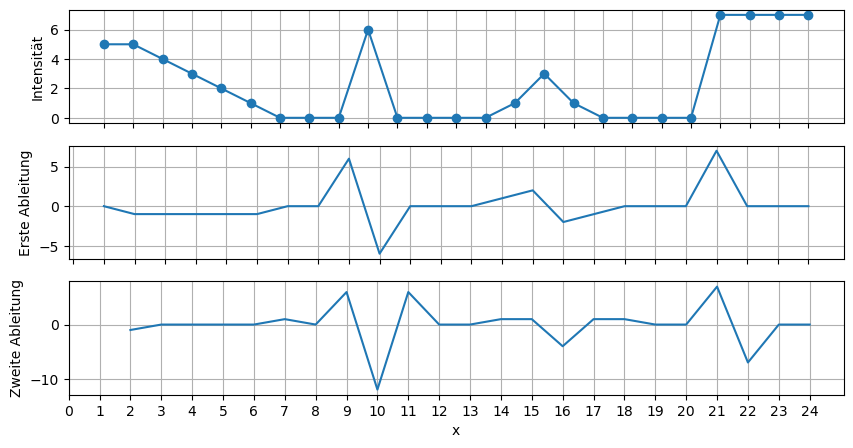

In [2]:
y = np.array([5,5,4,3,2,1,0,0,0,6,0,0,0,0,1,3,1,0,0,0,0,7,7,7,7])
x = np.arange(0,y.size)

y_d = np.diff(y)
y_dd = np.diff(y_d)

plt.figure(figsize=(10,5))
ax1 = plt.subplot(3,1,1)
plt.plot(x,y,'o-')
plt.xticks(x)
plt.ylabel('Intensität')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.grid(True)

ax2 = plt.subplot(3,1,2)
plt.plot(x[1:],y_d)
plt.xticks(x)
plt.ylabel('Erste Ableitung')
plt.setp(ax2.get_xticklabels(), visible=False)
plt.grid(True)

ax3 = plt.subplot(3,1,3)
plt.plot(x[2:],y_dd)
plt.xticks(x)
plt.ylabel('Zweite Ableitung')
plt.xlabel('x')
ax3 = plt.setp(ax3.get_xticklabels(), visible=True)
plt.grid(True)


## Anwendung der Punktdetektion auf Beispieldaten
![](./img/ex_point_detection.jpg)

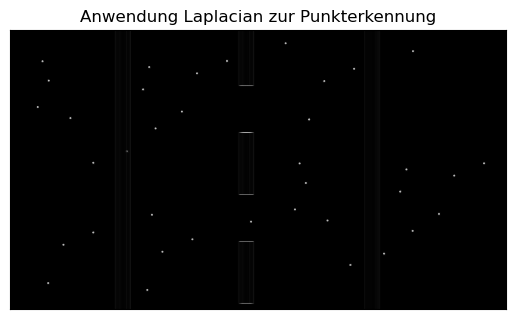

Wende Threshold =  240  an:


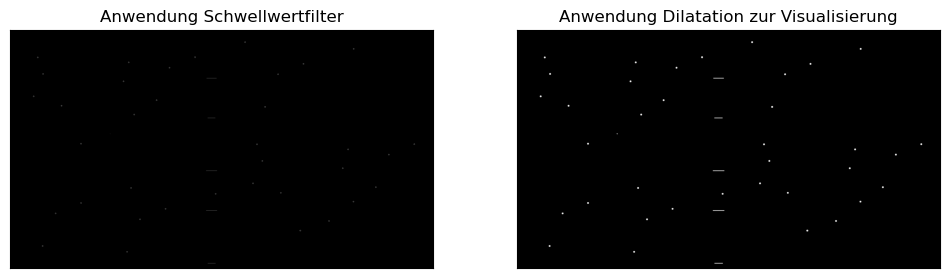

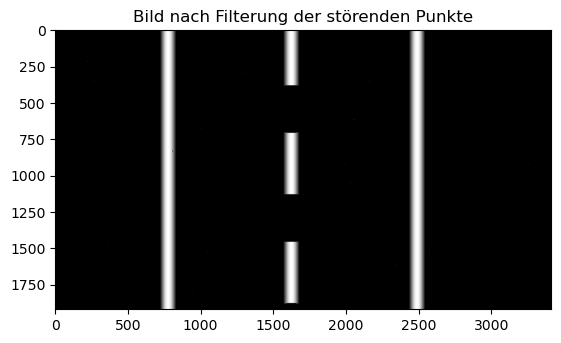

In [3]:
img = cv.imread('./img/ex_point_detection.jpg', cv.IMREAD_GRAYSCALE)
# 1. Anwendung Laplacian zur Punkterkennung
kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]],np.float32)
dst = cv.filter2D(img,-1,kernel)
plt.imshow(dst, cmap='gray', vmin=0, vmax=100)
plt.xticks([]), plt.yticks([])
plt.title('Anwendung Laplacian zur Punkterkennung')
plt.show()

# Filterung mit Schwellwert
#thresholds = np.arange(180,250,10)
thresholds = [240]
for thresh in thresholds:
    dst = cv.filter2D(img,-1,kernel)
    print('Wende Threshold = ', thresh, ' an:')
    dst[dst >= thresh] = 255
    dst[dst < thresh] = 0
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.imshow(dst, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.title('Anwendung Schwellwertfilter')    

    # Visualisierung --> Vergrößere die Punkte durch Dilatation
    dil_kernel = np.ones((5,5),np.uint8)
    dst = cv.dilate(dst,dil_kernel,iterations = 1)
    plt.subplot(1,2,2)
    plt.imshow(dst, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.title('Anwendung Dilatation zur Visualisierung')
    plt.show()
    
# 2. in unserem Anwendungsbeispiel handelt es sich bei Punkten um Störgrößen, die gefiltert werden müssen    
img_filtered = img.copy()
img_filtered[np.where(dst==255)] = 0
plt.figure()
plt.imshow(img_filtered, cmap='gray')
plt.title('Bild nach Filterung der störenden Punkte')
plt.show()

## Anwendung der Liniendetektion auf Beispieldaten

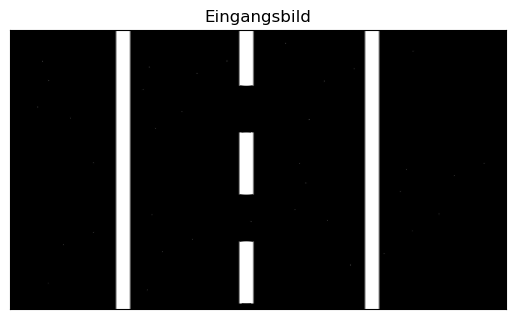

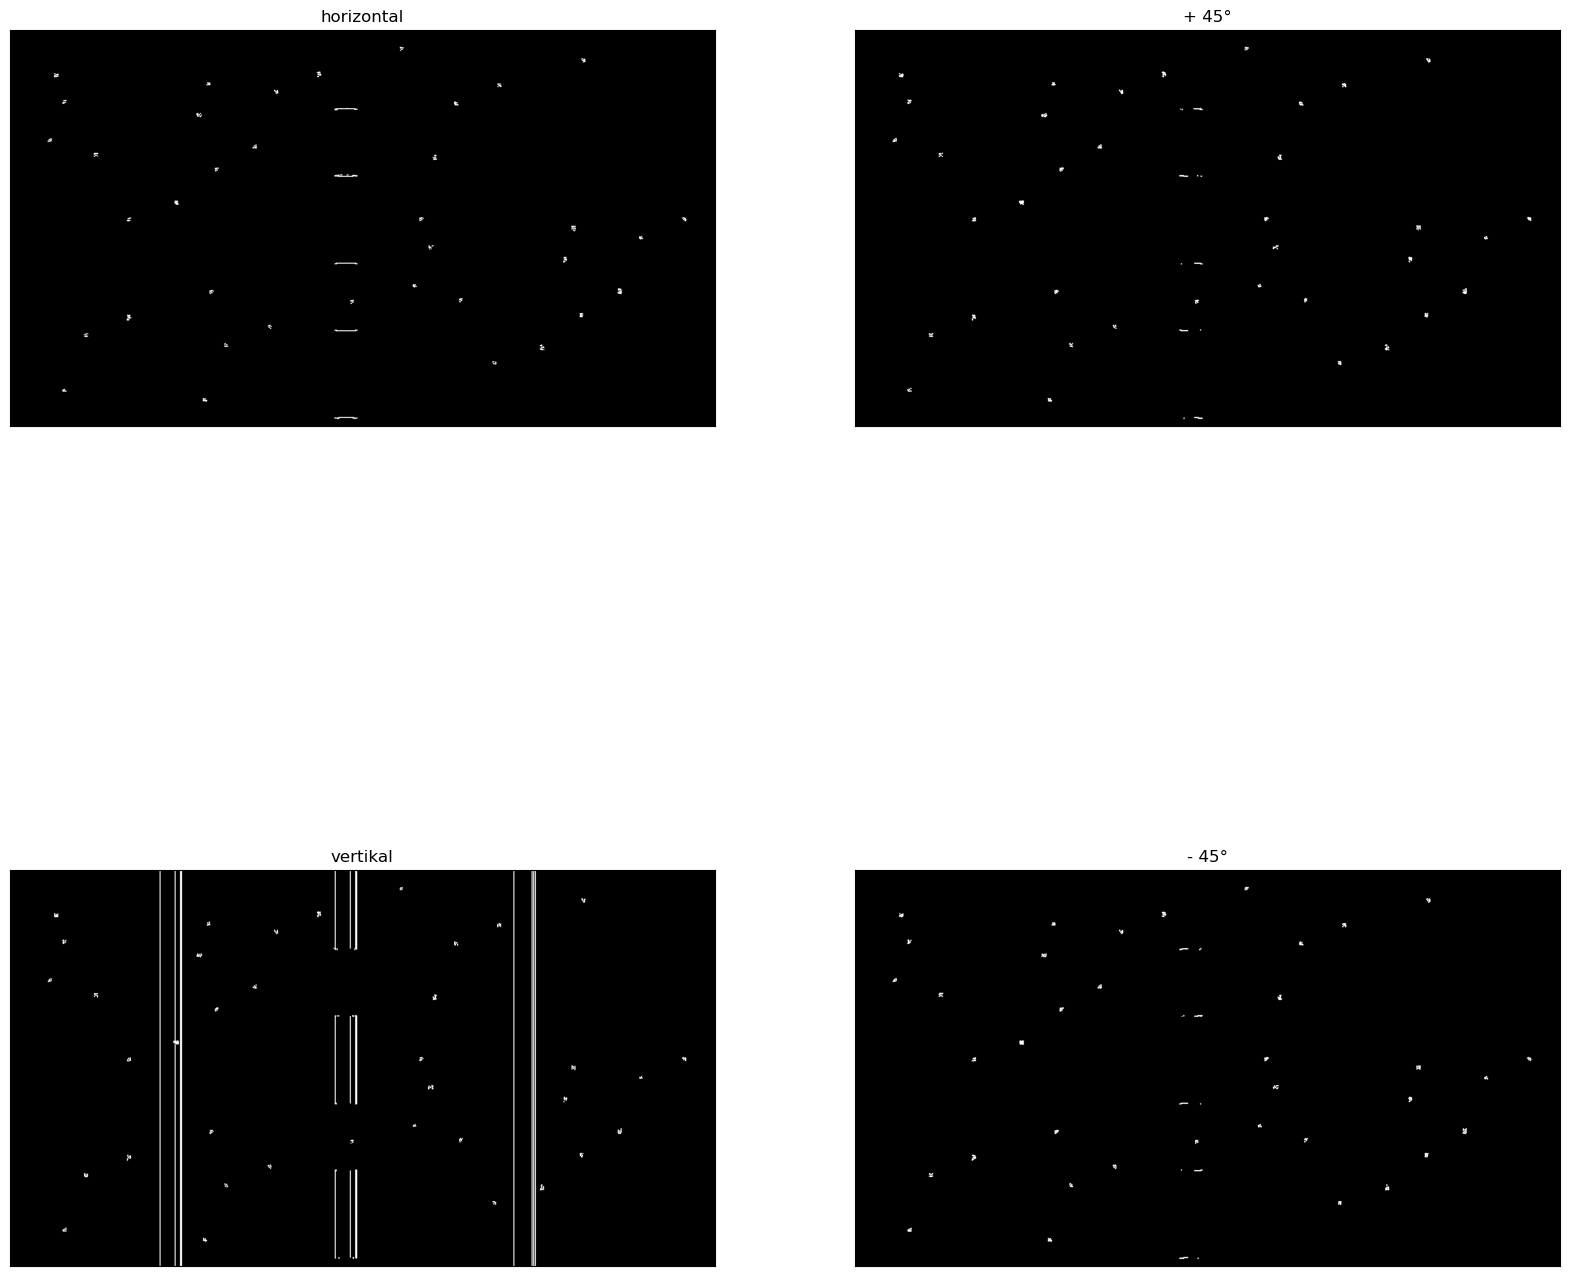

In [4]:
plt.imshow(img, cmap='gray')
plt.xticks([]), plt.yticks([])

# filtere isolierte Punkte heraus
img[dst > 200] = 0
plt.imshow(img, cmap='gray', vmin=0, vmax=100)
plt.xticks([]), plt.yticks([])
plt.title('Eingangsbild')
plt.show()

# Anwendung Linienmasken zur Liniendetektion + anschließend Dilatation zur Visualisierung
# 1. horizontal
kernel_hor = np.array([[-1,-1,-1],[2,2,2],[-1,-1,-1]],np.float32)
# 2. +45°
kernel_45p = np.array([[2,-1,-1],[-1,2,-1],[-1,-1,2]],np.float32)
# 3. vertikal
kernel_ver = np.array([[-1,2,-1],[-1,2,-1],[-1,2,-1]],np.float32)
# 4. -45°
kernel_45n = np.array([[-1,-1,2],[-1,2,-1],[2,-1,-1]],np.float32)

plt.figure(figsize=(20,20))
kernels = [kernel_hor, kernel_45p, kernel_ver, kernel_45n]
kernel_labels = ['horizontal', '+ 45°', 'vertikal', '- 45°']
threshold = 10
dil_kernel = np.ones((5,5),np.uint8)
for i in np.arange(len(kernels)):
    dst_kernel = cv.filter2D(img, -1, kernels[i])
    dst_kernel[dst_kernel >= threshold] = 255
    dst_kernel[dst_kernel <  threshold] = 0    
    dst_kernel = cv.dilate(dst_kernel,dil_kernel,iterations = 1)
    plt.subplot(2,2,i+1)
    plt.imshow(dst_kernel, cmap='gray')
    plt.title(kernel_labels[i])
    plt.xticks([]), plt.yticks([])
    
plt.show()

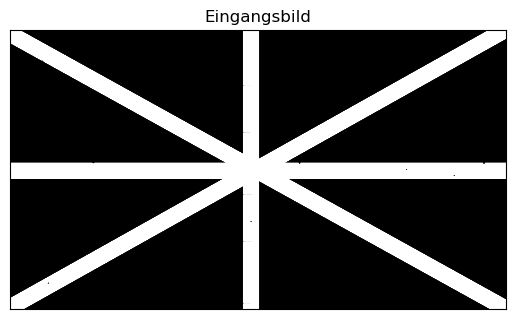

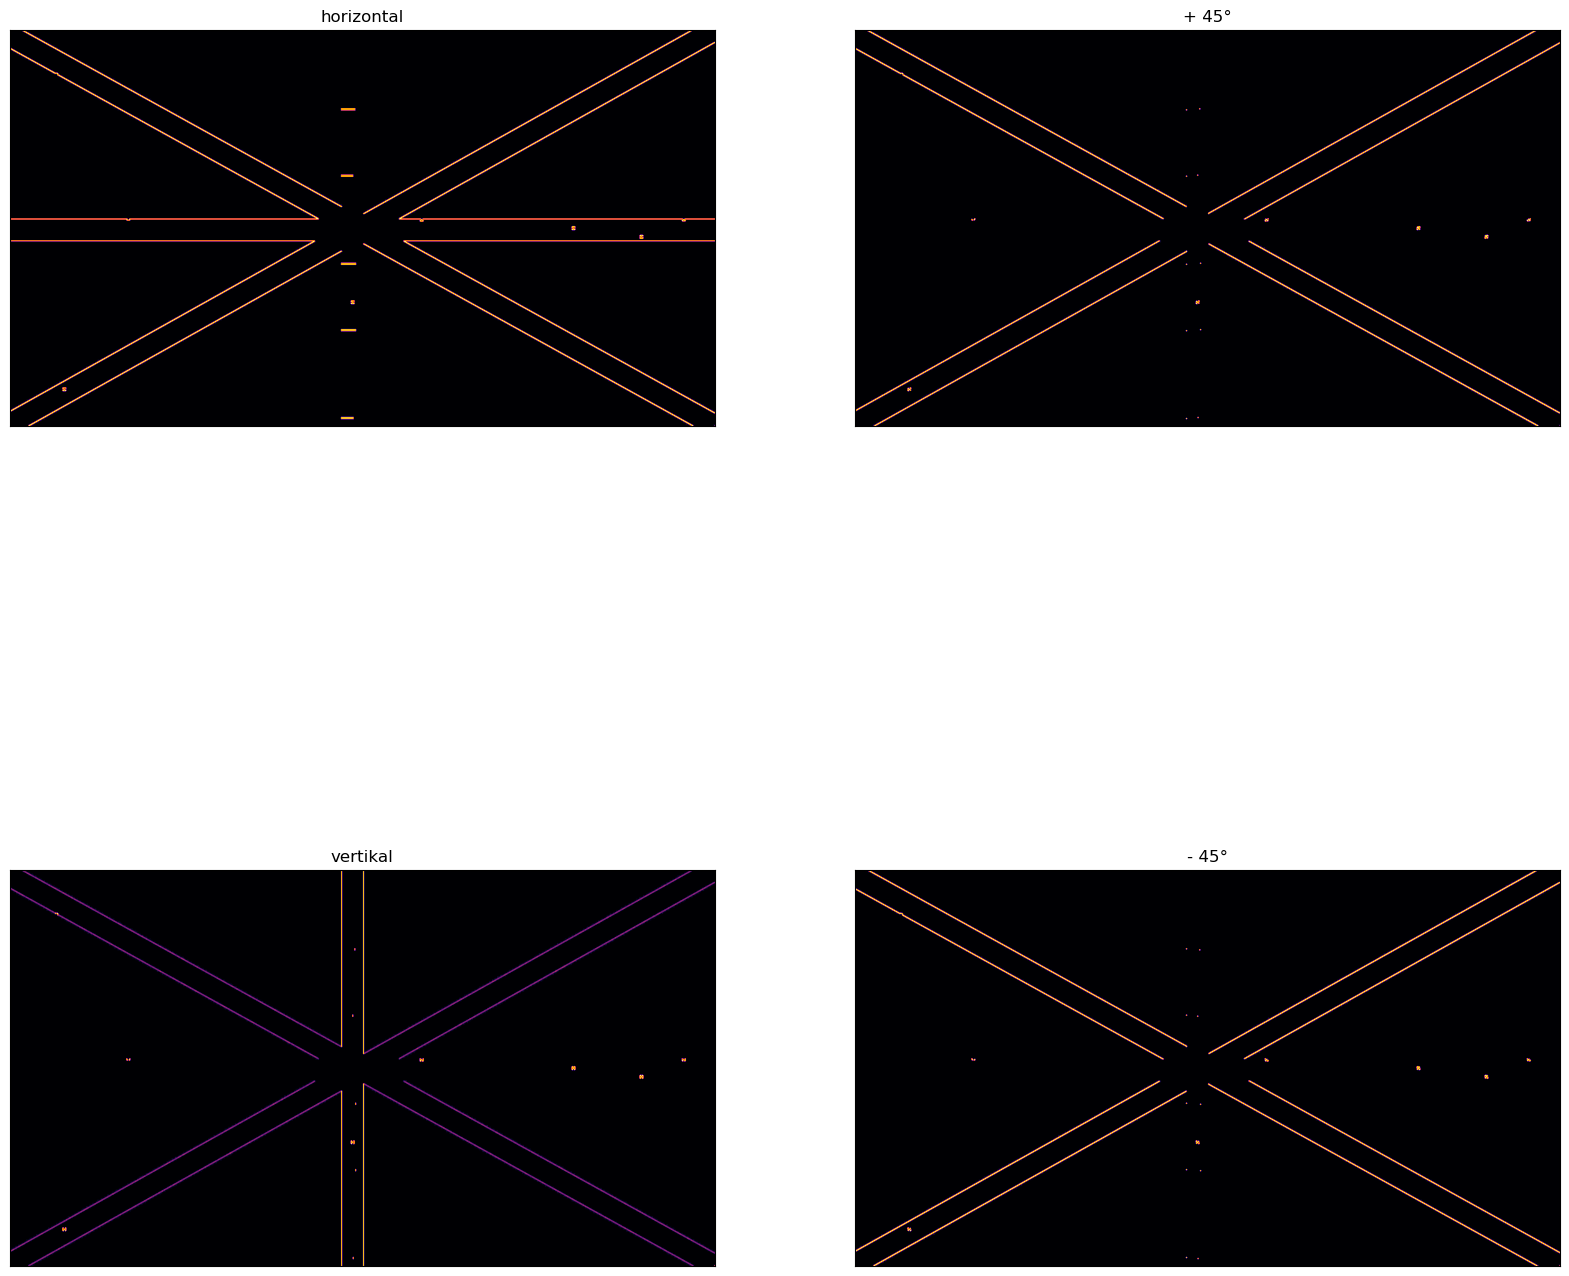

In [5]:
img = cv.imread('./img/ex_line_detection.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.xticks([]), plt.yticks([])

# filtere isolierte Punkte heraus
img[dst > 200] = 0
plt.imshow(img, cmap='gray', vmin=0, vmax=100)
plt.xticks([]), plt.yticks([])
plt.title('Eingangsbild')
plt.show()

# Anwendung Linienmasken zur Liniendetektion + anschließend Dilatation zur Visualisierung
# 1. horizontal
kernel_hor = np.array([[-1,-1,-1],[2,2,2],[-1,-1,-1]],np.float32)
# 2. +45°
kernel_45p = np.array([[2,-1,-1],[-1,2,-1],[-1,-1,2]],np.float32)
# 3. vertikal
kernel_ver = np.array([[-1,2,-1],[-1,2,-1],[-1,2,-1]],np.float32)
# 4. -45°
kernel_45n = np.array([[-1,-1,2],[-1,2,-1],[2,-1,-1]],np.float32)

plt.figure(figsize=(20,20))
kernels = [kernel_hor, kernel_45p, kernel_ver, kernel_45n]
kernel_labels = ['horizontal', '+ 45°', 'vertikal', '- 45°']
threshold = 10
dil_kernel = np.ones((5,5),np.uint8)
for i in np.arange(len(kernels)):
    dst_kernel = cv.filter2D(img, -1, kernels[i])
    #dst_kernel[dst_kernel >= threshold] = 255
    #dst_kernel[dst_kernel <  threshold] = 0    
    dst_kernel = cv.dilate(dst_kernel,dil_kernel,iterations = 1)
    plt.subplot(2,2,i+1)
    #plt.imshow(dst_kernel, cmap='gray')
    plt.imshow(dst_kernel, cmap='inferno')
    plt.title(kernel_labels[i])
    plt.xticks([]), plt.yticks([])
    
plt.show()

## Kantenerkennung

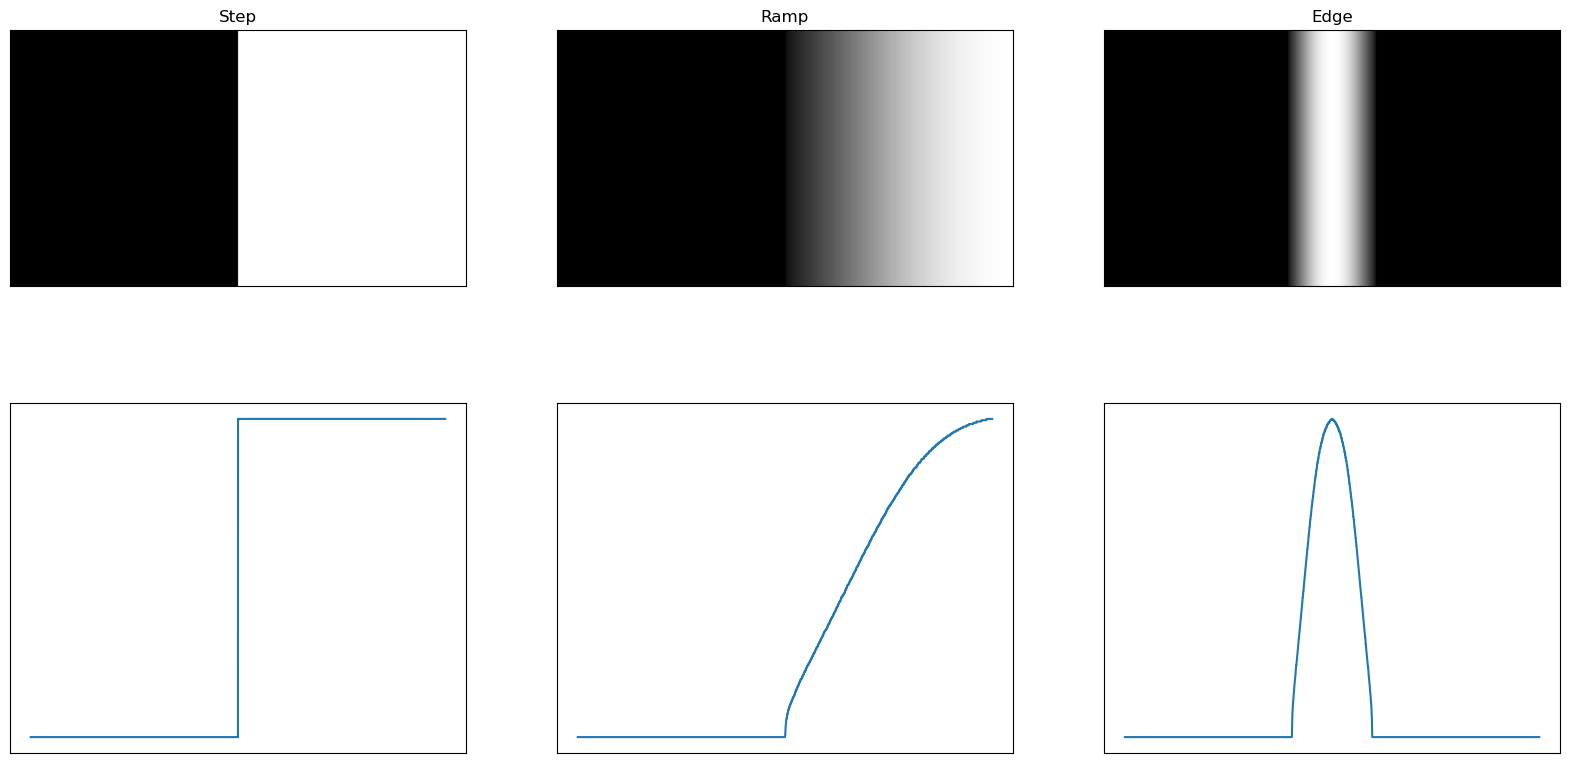

In [6]:
# Erstes Beispielbild: Step
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(20,10)
img = cv.imread('./img/kanten_01.jpg', cv.IMREAD_GRAYSCALE)
axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_xticks([]) 
axs[0, 0].set_yticks([])
axs[0, 0].set_title('Step')
axs[1, 0].plot(img[10,:])
axs[1, 0].set_xticks([]) 
axs[1, 0].set_yticks([])

# Zweites Beispielbild: Ramp
img = cv.imread('./img/kanten_02.jpg', cv.IMREAD_GRAYSCALE)
axs[0, 1].imshow(img, cmap='gray')
axs[0, 1].set_xticks([]) 
axs[0, 1].set_yticks([])
axs[0, 1].set_title('Ramp')
axs[1, 1].plot(img[10,:])
axs[1, 1].set_xticks([]) 
axs[1, 1].set_yticks([])

# Drittes Beispielbild: Edge
img = cv.imread('./img/kanten_03.jpg', cv.IMREAD_GRAYSCALE)
axs[0, 2].imshow(img, cmap='gray')
axs[0, 2].set_xticks([]) 
axs[0, 2].set_yticks([])
axs[0, 2].set_title('Edge')
axs[1, 2].plot(img[10,:])
axs[1, 2].set_xticks([]) 
axs[1, 2].set_yticks([])

plt.show()

#fig = plt.gcf()
#fig.set_size_inches(10, 10)
#row = img[10,:]
#plt.plot(row)
#plt.xticks([]), plt.yticks([])
#plt.show()


## Beispielanwendung hor. + vert. Kantenerkennung mit Gradient

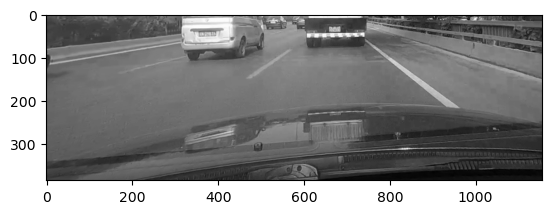

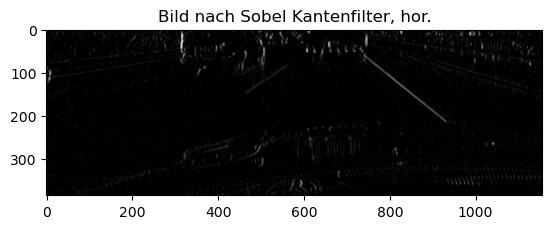

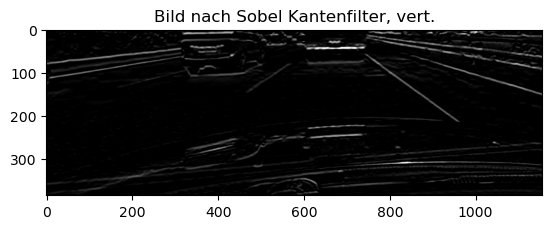

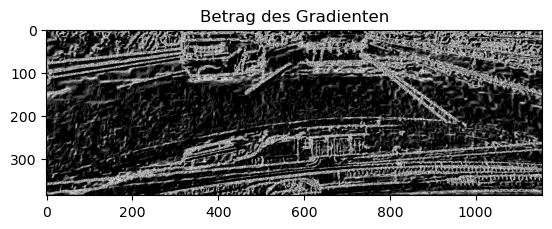

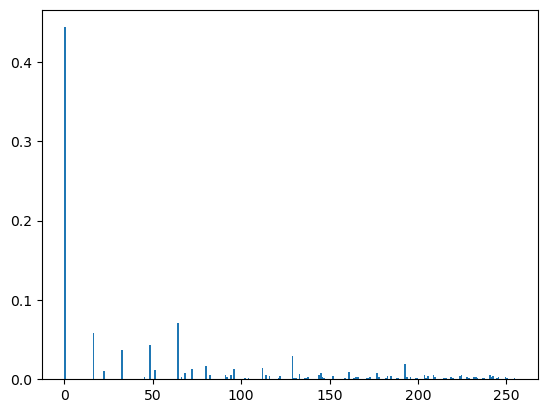

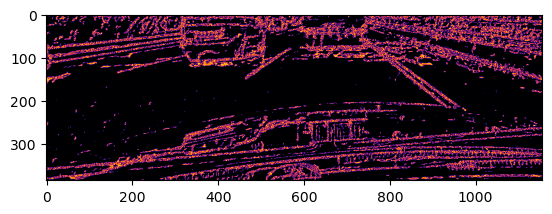

In [7]:
img_lanes = cv.imread('./img/uclanes_ex.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(img_lanes, cmap='gray')
plt.show()

# wende Blurring an
img_lanes = cv.GaussianBlur(img_lanes,(5,5),cv.BORDER_DEFAULT)

# wende 2D-Konvolution in x- und y-Richtung an
kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]],np.float32)
dst_x = cv.filter2D(img_lanes,-1,kernel)
plt.imshow(dst_x, cmap='gray')
plt.title('Bild nach Sobel Kantenfilter, hor.')
plt.show()

kernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],np.float32)
dst_y = cv.filter2D(img_lanes,-1,kernel)
plt.imshow(dst_y, cmap='gray')
plt.title('Bild nach Sobel Kantenfilter, vert.')
plt.show()

# Betrag = (x^2 + y^2)^(1/2)
img_magnitude = np.sqrt(np.square(dst_x) + np.square(dst_y))
img_magnitude *= 255 / img_magnitude.max()
img_magnitude = np.uint8(img_magnitude)
plt.imshow(img_magnitude, cmap='gray')
plt.title('Betrag des Gradienten')
plt.show()

# Histogrmamm zur Auswahl des Schwellwerts
plt.hist(img_magnitude.ravel(),256,[0,255], density=True)
plt.show()

# Anwendung des Schwellwerts
img_magnitude[img_magnitude < 150] = 0
plt.imshow(img_magnitude, cmap='inferno')
plt.show()

## Beispielanwendung diagonale Kantenerkennung mit Gradient

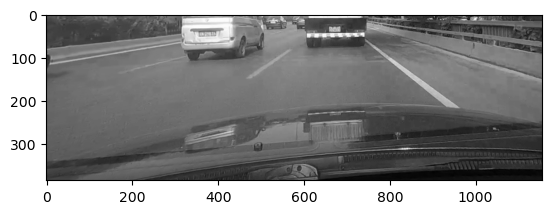

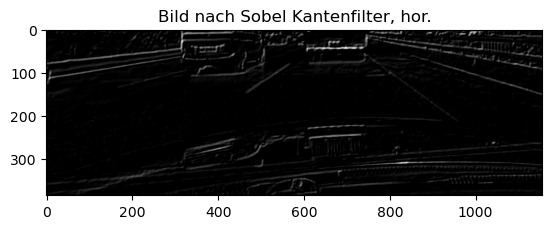

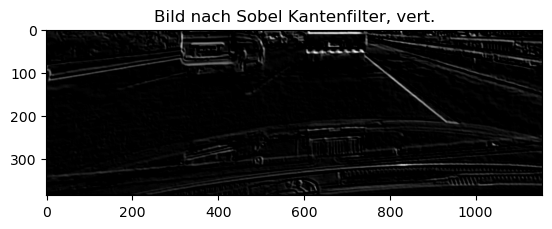

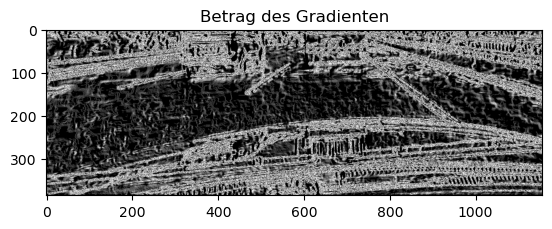

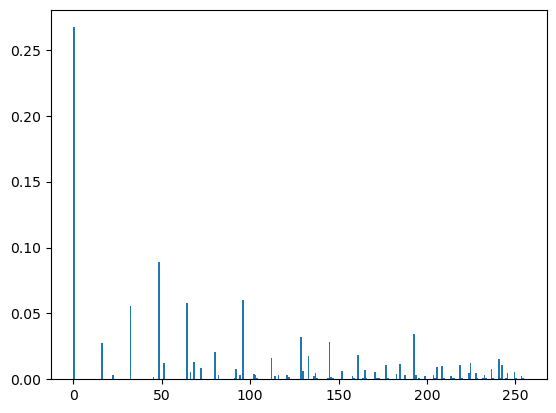

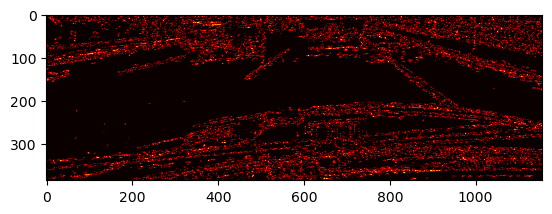

In [8]:
img_lanes = cv.imread('./img/uclanes_ex.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(img_lanes, cmap='gray')
plt.show()

# wende Blurring an
img_lanes = cv.GaussianBlur(img_lanes,(5,5),cv.BORDER_DEFAULT)

# wende 2D-Konvolution in x- und y-Richtung an
kernel = np.array([[-2,-1,0],[-1,0,1],[0,1,2]],np.float32)
dst_x = cv.filter2D(img_lanes,-1,kernel)
plt.imshow(dst_x, cmap='gray')
plt.title('Bild nach Sobel Kantenfilter, hor.')
plt.show()

kernel = np.array([[0,1,2],[-1,0,1],[-2,-1,0]],np.float32)
dst_y = cv.filter2D(img_lanes,-1,kernel)
plt.imshow(dst_y, cmap='gray')
plt.title('Bild nach Sobel Kantenfilter, vert.')
plt.show()

# Betrag = (x^2 + y^2)^(1/2)
img_magnitude = np.sqrt(np.square(dst_x) + np.square(dst_y))
img_magnitude *= 255 / img_magnitude.max()
img_magnitude = np.uint8(img_magnitude)
plt.imshow(img_magnitude, cmap='gray')
plt.title('Betrag des Gradienten')
plt.show()

# Histogrmamm zur Auswahl des Schwellwerts
plt.hist(img_magnitude.ravel(),256,[0,255], density=True)
plt.show()

# Anwendung des Schwellwerts
img_magnitude[img_magnitude < 240] = 0
plt.imshow(img_magnitude, cmap='hot')
plt.show()

## Kantenerkennung mit Canny Edge

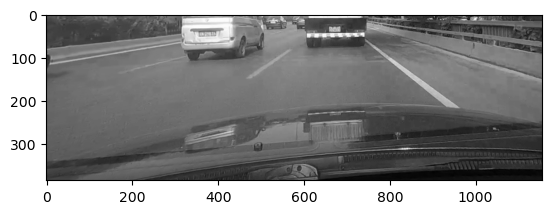

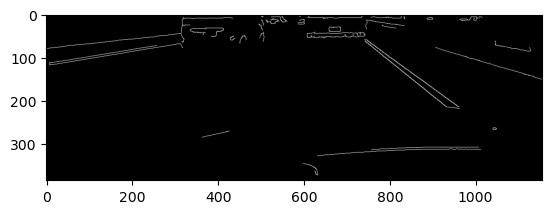

In [9]:
img_lanes = cv.imread('./img/uclanes_ex.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(img_lanes, cmap='gray')
plt.show()

# wende Blurring an
img_lanes = cv.GaussianBlur(img_lanes,(5,5),cv.BORDER_DEFAULT)

# wende Canny Edge an
dst = cv.Canny(img_lanes,100,200)
plt.imshow(dst, cmap='gray')
plt.show()

## Aufgabe: Experimentieren Sie mit dem Canny-Edge-Operator. Welche Parameterkombinationen sind am besten geeignet zur Spurmarkierungserkennung?

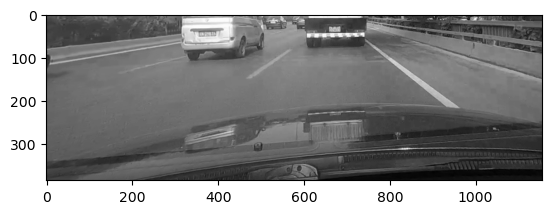

In [10]:
img_lanes = cv.imread('./img/uclanes_ex.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(img_lanes, cmap='gray')
plt.show()